### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [414]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [415]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the data types.
print(reviews.dtypes)

# View the metadata.
print(reviews.info())

# View the DataFrame.
reviews.head()

gender                     object
age                         int64
remuneration (k£)         float64
spending_score (1-100)      int64
loyalty_points              int64
education                  object
language                   object
platform                   object
product                     int64
review                     object
summary                    object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform               

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [416]:
# Any missing values?
reviews.isna().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

In [417]:
# Explore the data.
# Descriptive statistics.
reviews.describe() 

age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000

## 2. Drop columns

In [418]:
# Drop unnecessary columns.
reviews_final = reviews.drop(['language', 'platform'],
                       axis=1)

# View column names.
reviews_final.columns

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')

## 3. Rename columns

In [419]:
# Rename the column headers.
df_new = reviews_final.rename(columns={'remuneration (k£)': 'renumeration',
                            'spending_score (1-100)': 'spending_score'})

# View column names.
df_new.columns

Index(['gender', 'age', 'renumeration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')

## 4. Save the DataFrame as a CSV file

In [420]:
# Create a CSV file as output.
# Export the DataFrame to CSV.
df_new.to_csv('cleaned_turtle_reviews.csv', index=False)

In [421]:
# Import new CSV file with Pandas.
cleaned_reviews = pd.read_csv('cleaned_turtle_reviews.csv')

# View the metadata.
print(cleaned_reviews.info())

# View DataFrame.
cleaned_reviews.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   renumeration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB
None


gender  age  renumeration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

## 5. Linear regression

### 5a) spending vs loyalty

In [422]:
# Independent variable.
x1 = cleaned_reviews['spending_score'] 

# Dependent variable.
y = cleaned_reviews['loyalty_points']

# Check for linearity with Matplotlib.
plt.scatter(x1, y)

# Create formula and pass through OLS methods.
f = 'y ~ x1'
test1 = ols(f, data = cleaned_reviews).fit()

In [423]:
# Print the regression table.
test1.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          2.92e-263
Time:                        05:17:00   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x1            33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [424]:
# Extract the estimated parameters.
print("Parameters: ", test1.params) 

# Extract the standard errors.
print("Standard errors: ", test1.bse)   

# Extract the predicted values.
print("Predicted values: ", test1.predict())  

Parameters:  Intercept   -75.052663
x1           33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x1            0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [425]:
# Set the X coefficient and the constant to generate the regression table.
y_pred1 = (-75.0527) + 33.0617 * cleaned_reviews['spending_score']

# View the output.
y_pred1

0       1214.3536
1       2602.9450
2        123.3175
3       2470.6982
4       1247.4153
          ...    
1995    2206.2046
1996     189.4409
1997    2933.5620
1998     453.9345
1999     189.4409
Name: spending_score, Length: 2000, dtype: float64

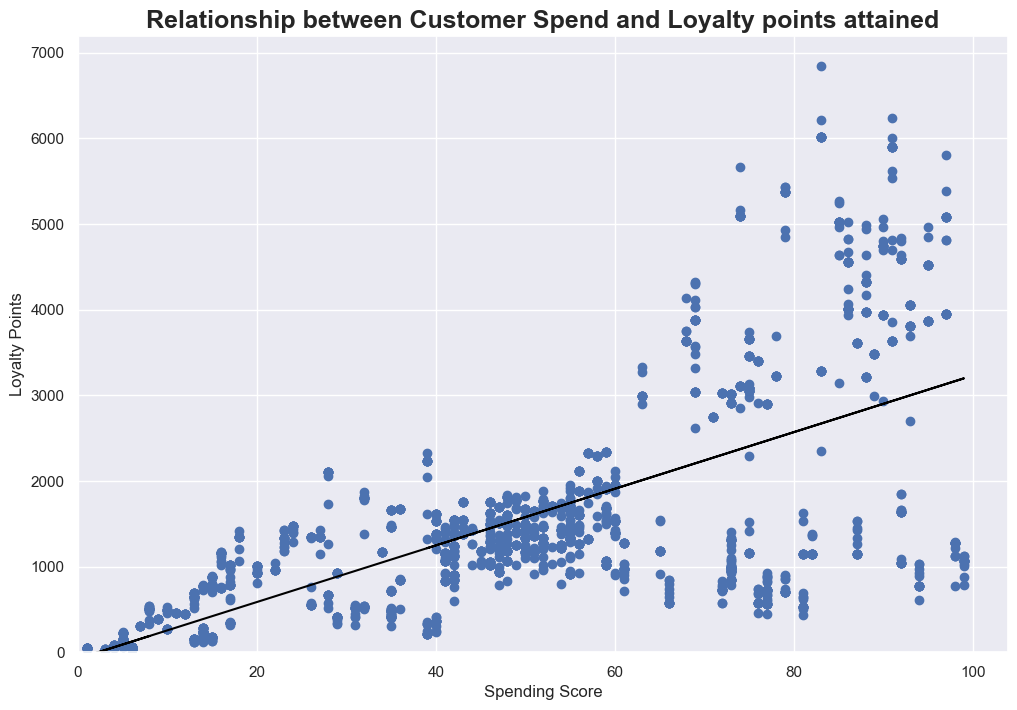

In [426]:
# Plot the data points with a scatterplot.
plt.scatter(x1, y)

# Plot the regression line (in black).
plt.plot(x1, y_pred1, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Add a title.
plt.title('Relationship between Customer Spend and Loyalty points attained', fontsize=18, fontweight='bold')

# Add x and y axis labels
plt.xlabel('Spending Score')
plt.ylabel('Loyalty Points')

# View the plot.
plt.show()

### 5b) renumeration vs loyalty

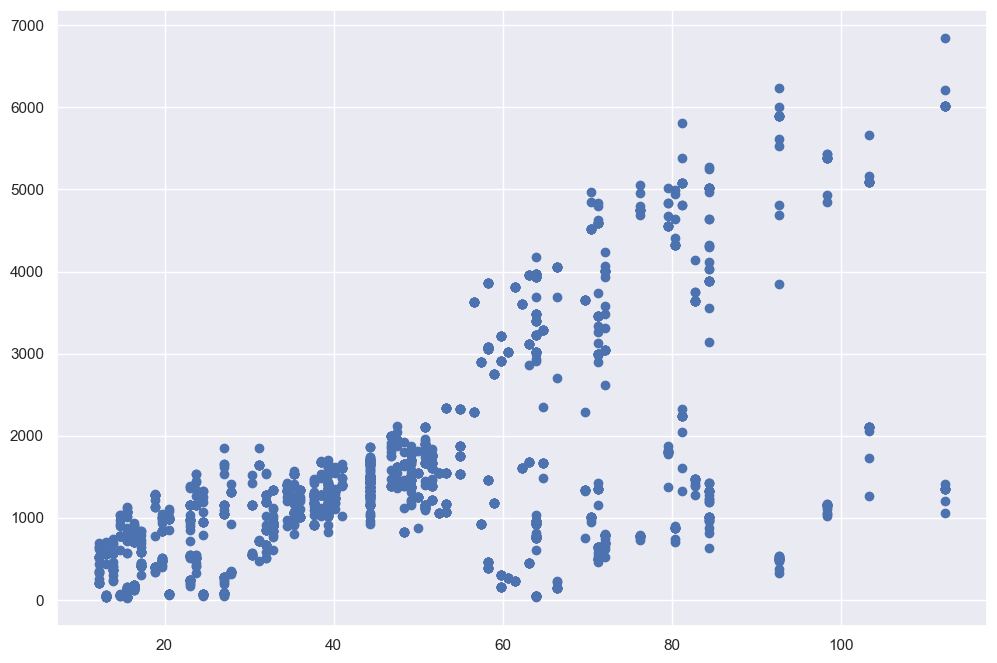

In [427]:
# Independent variable.
x2 = cleaned_reviews['renumeration'] 

# Dependent variable.
y = cleaned_reviews['loyalty_points']

# Check for linearity with Matplotlib.
plt.scatter(x2, y)

# Create formula and pass through OLS methods.
f = 'y ~ x2'
test2 = ols(f, data = cleaned_reviews).fit()

In [428]:
# Print the regression table.
test2.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Mon, 09 Oct 2023   Prob (F-statistic):          2.43e-209
Time:                        05:17:01   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x2            34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [429]:
# Extract the estimated parameters.
print("Parameters: ", test2.params) 

# Extract the standard errors.
print("Standard errors: ", test2.bse)   

# Extract the predicted values.
print("Predicted values: ", test2.predict())  

Parameters:  Intercept   -65.686513
x2           34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x2            0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [430]:
# Set the X coefficient and the constant to generate the regression table.
y_pred2 = (-65.6865) + 34.1878 * cleaned_reviews['renumeration']

# View the output.
y_pred2

0        354.823440
1        354.823440
2        382.857436
3        382.857436
4        410.891432
           ...     
1995    2821.815088
1996    3102.155048
1997    3102.155048
1998    3298.393020
1999    3102.155048
Name: renumeration, Length: 2000, dtype: float64

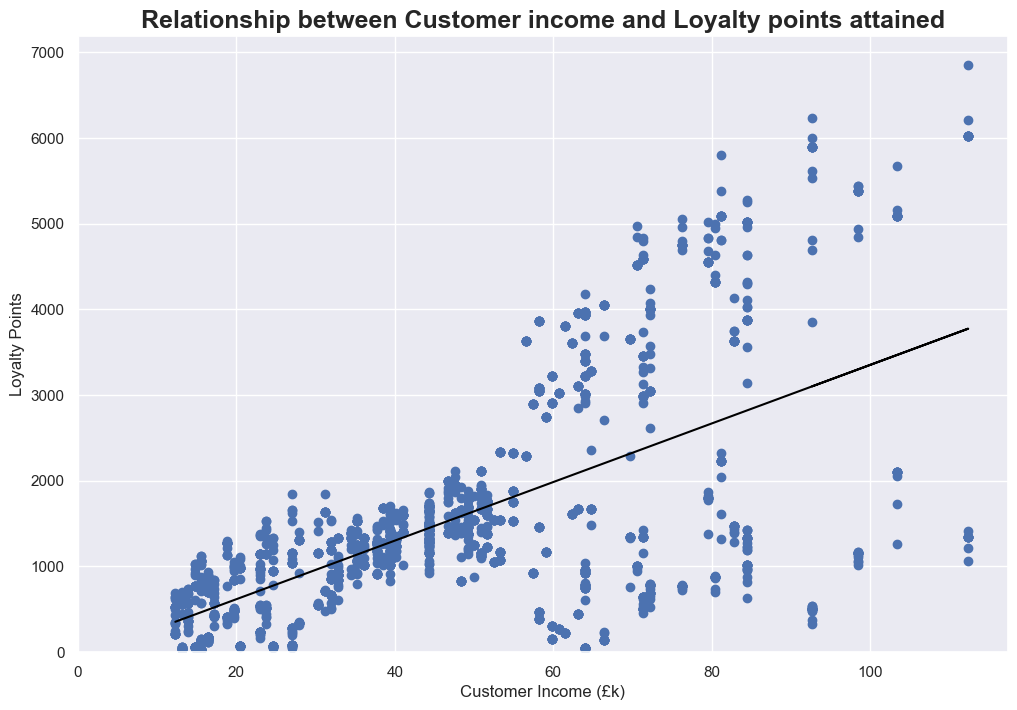

In [431]:
# Plot the data points with a scatterplot.
plt.scatter(x2, y)

# Plot the regression line (in black).
plt.plot(x2, y_pred2, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Add a title.
plt.title('Relationship between Customer income and Loyalty points attained', fontsize=18, fontweight='bold')

# Add x and y axis labels
plt.xlabel('Customer Income (£k)')
plt.ylabel('Loyalty Points')

# View the plot.
plt.show()

### 5c) age vs loyalty

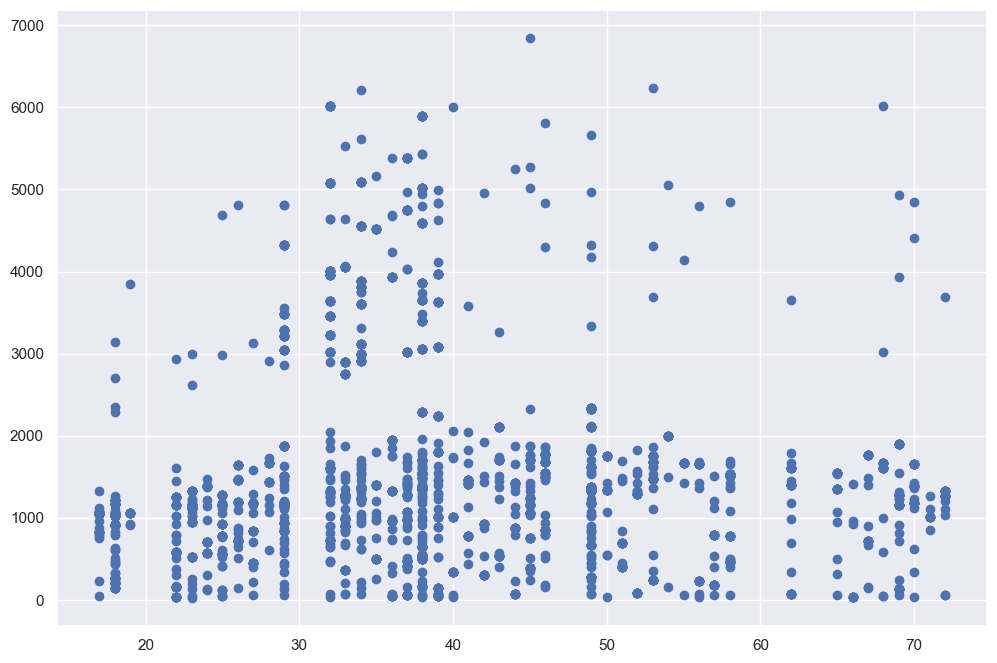

In [432]:
# Independent variable.
x3 = cleaned_reviews['age'] 

# Dependent variable.
y = cleaned_reviews['loyalty_points']

# Check for linearity with Matplotlib.
plt.scatter(x3, y)

# Create formula and pass through OLS methods.
f = 'y ~ x3'
test3 = ols(f, data = cleaned_reviews).fit()

In [433]:
# Print the regression table.
test3.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Mon, 09 Oct 2023   Prob (F-statistic):             0.0577
Time:                        05:17:02   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x3            -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [434]:
# Extract the estimated parameters.
print("Parameters: ", test3.params) 

# Extract the standard errors.
print("Standard errors: ", test3.bse)   

# Extract the predicted values.
print("Predicted values: ", test3.predict())  

Parameters:  Intercept    1736.517739
x3             -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x3            2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [435]:
# Set the X coefficient and the constant to generate the regression table.
y_pred3 = (1736.5177) + -4.0128 * cleaned_reviews['age']

# View the output.
y_pred3

0       1664.2873
1       1644.2233
2       1648.2361
3       1636.1977
4       1604.0953
          ...    
1995    1588.0441
1996    1563.9673
1997    1600.0825
1998    1600.0825
1999    1608.1081
Name: age, Length: 2000, dtype: float64

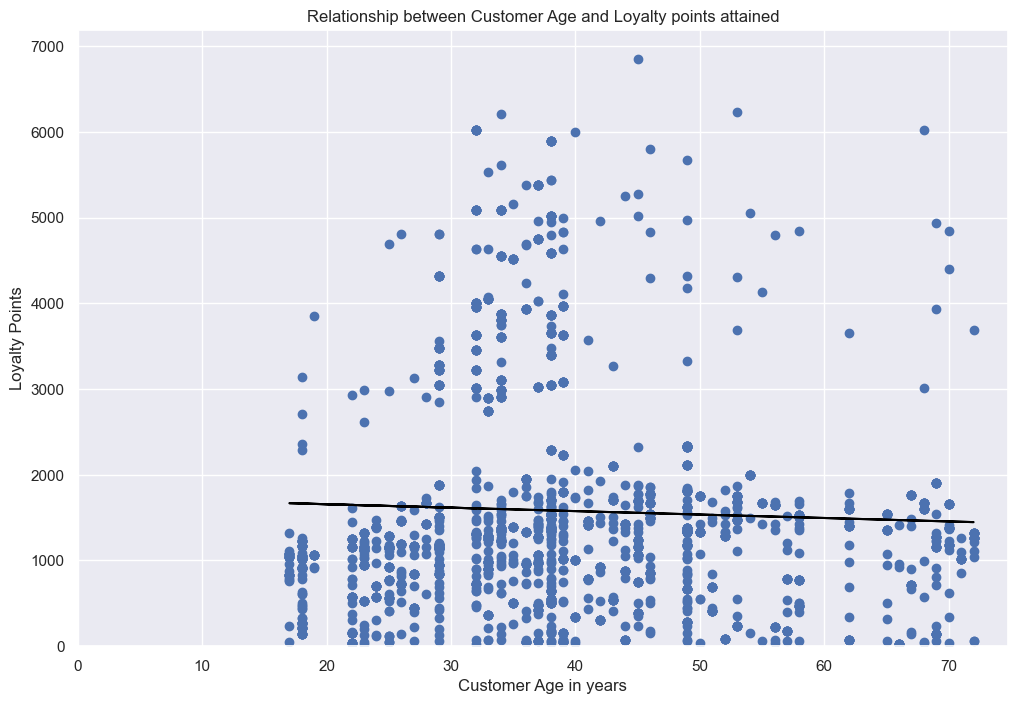

In [436]:
# Plot graph with regression line.
# Plot the data points with a scatterplot.
plt.scatter(x3, y)

# Plot the regression line (in black).
plt.plot(x3, y_pred3, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Add a title.
plt.title('Relationship between Customer Age and Loyalty points attained')

# Add x and y axis labels
plt.xlabel('Customer Age in years')
plt.ylabel('Loyalty Points')

# View the plot.
plt.show()

## 6. Observations and insights

***Your observations here...***






For spending score vs. loyalty points: The overall trend is a positive linear correlation between the two variables. However, it is noted that there are substantial number of customers with a high spending score that have a relatively low number of loyalty points. It has been noted that the data becomes more dispersed when the spending score exceeds 60 so that the data points are further from the line of best fit. The value of the R-squared is 0.452 from the OLS regression results which suggests a weak/moderate positive linear relationship between the two variables. The spending score variable is able to explain approximately 45% of the variability of the Loyalty points.

For renumeration(customer annual income) vs. loyalty points: The overall trend is a positive linear correlation between the two variables. However, it was noted that the scatterplot shows a clear partition in the data for customer incomes greater than £60,000. The loyalty points get dispersed into two segments/clusters. The value of the R-squared is 0.380 from the OLS regression results which suggests a weak positive linear relationshop between the two variables. The annual income of customers is able to explain approximately 38% of the variability of the loyalty points.

For customer age vs. loyalty points: There is no overall trend from the data though it appears to be split into two segments where one segment accumulates relatively higher loyalty points and the other segment accumulates relatively lower loyalty points irrespective of the customer age. The value of the R-squared is 0.002 from the OLS regression results which shows that there's virtually no relationship between the two variables - the age explains 0.2% of the variability of the loyalty points.

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [437]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [438]:
# Load the CSV file(s) as df2.
df2 = pd.read_csv('cleaned_turtle_reviews.csv')

# View DataFrame.
df2.head()

gender  age  renumeration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [439]:
# Drop unnecessary columns.
df2_new = df2.drop(columns=['gender', 'age', 'loyalty_points', 'education', 'product', 'review', 'summary'])

# View DataFrame.
df2_new.head()

renumeration  spending_score
0         12.30              39
1         12.30              81
2         13.12               6
3         13.12              77
4         13.94              40

In [440]:
# Explore the data.
df2_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   renumeration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [441]:
# Descriptive statistics.
df2_new.describe()

renumeration  spending_score
count   2000.000000     2000.000000
mean      48.079060       50.000000
std       23.123984       26.094702
min       12.300000        1.000000
25%       30.340000       32.000000
50%       47.150000       50.000000
75%       63.960000       73.000000
max      112.340000       99.000000

## 2. Plot

In [442]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='renumeration',
                y='spending_score',
                data=df2_new)

<Axes: xlabel='renumeration', ylabel='spending_score'>

In [443]:
# Create a pairplot with Seaborn.
x = df2_new[['renumeration', 'spending_score']]

sns.pairplot(df2_new,
             vars=x,
             diag_kind= 'kde')

## 3. Elbow and silhoutte methods

In [444]:
# Determine the number of clusters: Elbow method.
# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++', 
                    max_iter = 500,
                    n_init = 10,
                    random_state = 42)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

plt.plot(range(1, 11),
         ss,
         marker='o')

plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS")

plt.show()

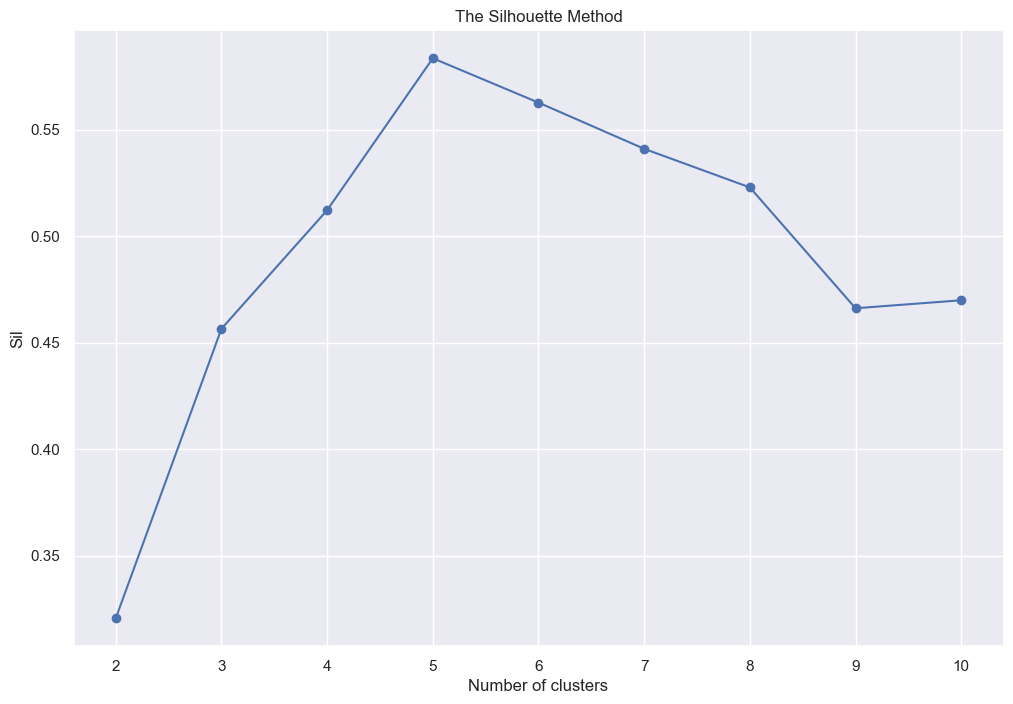

In [445]:
# Determine the number of clusters: Silhouette method.
# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

## 4. Evaluate k-means model at different values of *k*

#### Using five clusters

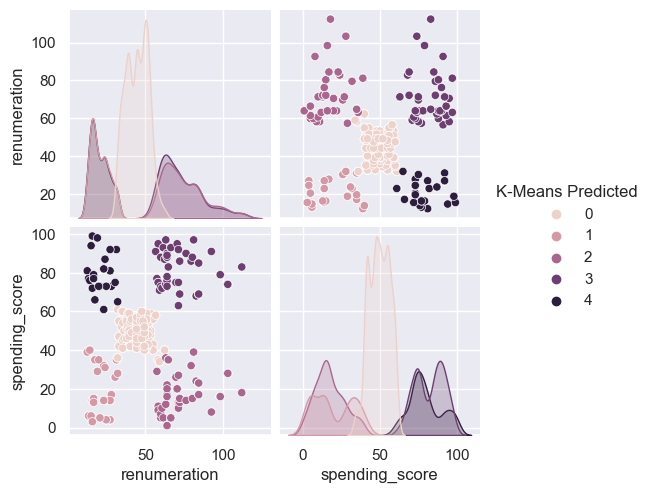

In [446]:
# Use five clusters.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted k-means.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [447]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

#### Using six clusters

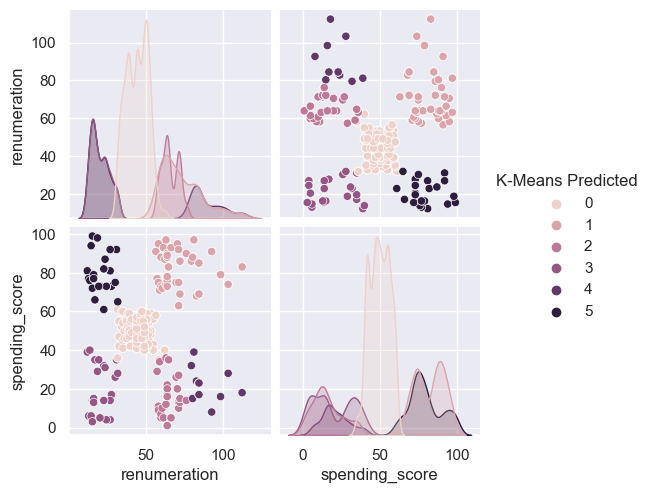

In [448]:
# Use six clusters.
kmeans = KMeans(n_clusters = 6, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted k-means.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [449]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    767
1    356
3    271
5    269
2    214
4    123
Name: K-Means Predicted, dtype: int64

#### Using seven clusters

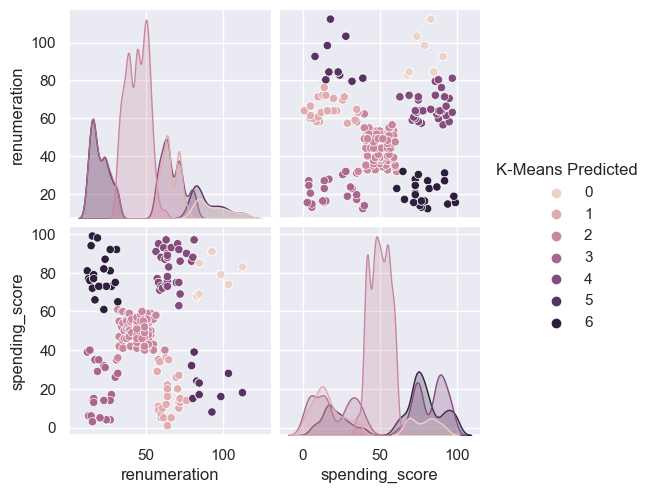

In [450]:
# Use seven clusters.
kmeans = KMeans(n_clusters = 7, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted k-means.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [451]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

2    767
3    271
4    271
6    269
1    214
5    123
0     85
Name: K-Means Predicted, dtype: int64

#### Using eight clusters

In [452]:
# Use eight clusters.
kmeans = KMeans(n_clusters = 8, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted k-means.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [453]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    728
1    269
6    238
5    214
7    156
4    154
3    123
2    118
Name: K-Means Predicted, dtype: int64

## 5. Fit final model and justify your choice

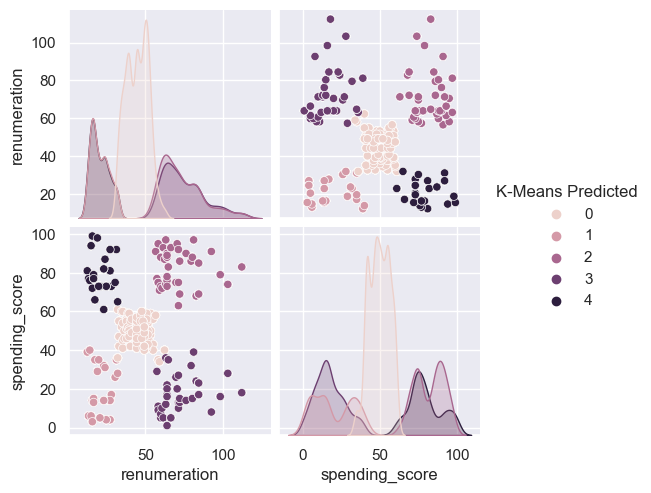

In [454]:
# Apply the final model.
# Use five clusters.
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted k-means.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [455]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
2    356
3    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

## 6. Plot and interpret the clusters

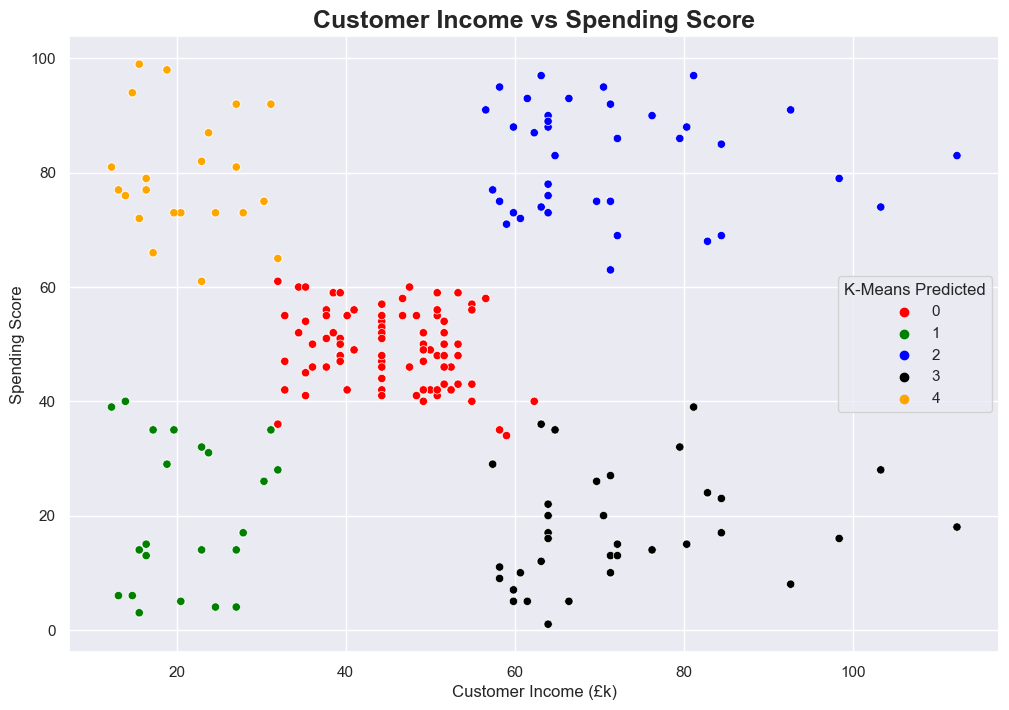

In [456]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x='renumeration' , 
                y ='spending_score',
                data=x,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])

# Change the title.
plt.title('Customer Income vs Spending Score', fontsize=18, fontweight='bold')

# Change x and y axis labels.
plt.xlabel('Customer Income (£k)')
plt.ylabel('Spending Score')

# Show the plot.
plt.show()

## 7. Discuss: Insights and observations

***Your observations here...***

The scatterplot of renumeration(customer income) vs. spending score shows five clusters. However, this is subjective so the Elbow and silhouette methods were employed.
The scatterplot for the elbow method shows the formation of an elbow after 5 clusters. The silhouette method has identified a peak at 5 clusters. Hence the decision was mad to choose 5 clusters.


There are five groups of customers: Customers with a moderate income and moderate spending score(red dots in scatterplot), Customers with a low income and low spending score(green dots), Customers with a low income and high spending score(yellow dots), customers with a high income and low spending score(black dots), customers with a high income and high spending score(blue dots).

Out of the 2000 customers, 774 have a moderate income and spending score (39%), 356 have a high income and spending score (18%), 330 have a high income and low spending score (16.5%), 271 have a low income and low spending score (13.5%) and 269 have a low income and high spending score(13%).

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [457]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# Import nltk and download nltk's resources to assist with tokenisation.
import nltk
nltk.download('punkt')

# Download the stopword list.
nltk.download ('stopwords')

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Alex\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alex\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [458]:
# Load the data set as df3.
df3 = pd.read_csv('cleaned_turtle_reviews.csv')

# View DataFrame.
df3.head()

gender  age  renumeration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [459]:
# Explore data set.
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   renumeration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [460]:
# Keep necessary columns. Drop unnecessary columns.
df3_new = df3.drop(columns=['gender', 'age', 'renumeration', 'spending_score', 'loyalty_points', 'education', 'product'])

# View DataFrame.
df3_new.head()

review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [461]:
# Determine if there are any missing values.
df3_new.isna().sum()

review     0
summary    0
dtype: int64

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [462]:
# Review: Change all to lower case and join with a space.
df3_new['review'] = df3_new['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [463]:
# Summary: Change all to lower case and join with a space.
df3_new['summary'] = df3_new['summary'].apply(lambda x: " ".join(x.lower() for x in x.split()))

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [464]:
# Replace all the punctuations in review column.
df3_new['review'] = df3_new['review'].str.replace('[^\w\s]','')

# View output.
df3_new['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [465]:
# Replace all the punctuations in summary column.
df3_new['summary'] = df3_new['summary'].str.replace('[^\w\s]','')

# View output.
df3_new['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2c) Drop duplicates in both columns

In [466]:
# Check the number of duplicate values in the review column.
df3_new.review.duplicated().sum()

50

In [467]:
# Check the number of duplicate values in the summary column.
df3_new.summary.duplicated().sum()

649

In [468]:
# Drop duplicates in both columns.
df4 = df3_new.drop_duplicates(subset=['review'])
df4 = df4.drop_duplicates(subset=['summary'])
# View DataFrame.
df4.reset_index(inplace=True)
df4.head()

index                                             review  \
0      0  when it comes to a dms screen the space on the...   
1      1  an open letter to galeforce9 your unpainted mi...   
2      2  nice art nice printing why two panels are fill...   
3      3  amazing buy bought it as a gift for our new dm...   
4      4  as my review of gf9s previous screens these we...   

                                             summary  
0  the fact that 50 of this space is wasted on ar...  
1  another worthless dungeon masters screen from ...  
2                     pretty but also pretty useless  
3                                         five stars  
4                                         money trap

In [469]:
# Double-check the number of duplicate values in the review column.
df4.review.duplicated().sum()

0

In [470]:
# Double-check the number of duplicate values in the summary column.
df4.summary.duplicated().sum()

0

## 3. Tokenise and create wordclouds

In [471]:
# Create new DataFrame (copy DataFrame).
df4_copy = df4

# View DataFrame.
df4_copy.head()

index                                             review  \
0      0  when it comes to a dms screen the space on the...   
1      1  an open letter to galeforce9 your unpainted mi...   
2      2  nice art nice printing why two panels are fill...   
3      3  amazing buy bought it as a gift for our new dm...   
4      4  as my review of gf9s previous screens these we...   

                                             summary  
0  the fact that 50 of this space is wasted on ar...  
1  another worthless dungeon masters screen from ...  
2                     pretty but also pretty useless  
3                                         five stars  
4                                         money trap

In [472]:
# Apply tokenisation to review column.
df4_copy['tokens'] = df4_copy['review'].apply(word_tokenize)

# View DataFrame.
df4_copy['tokens'].head()

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: tokens, dtype: object

In [473]:
# Apply tokenisation to summary column.
df4_copy['tokens_2'] = df4_copy['summary'].apply(word_tokenize)

# View DataFrame.
df4_copy['tokens_2'].head()

0    [the, fact, that, 50, of, this, space, is, was...
1    [another, worthless, dungeon, masters, screen,...
2                 [pretty, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: tokens_2, dtype: object

In [474]:
# Review: Create a word cloud.
# String all the comments together in a single variable.
# Create an empty string variable.
all_comments = ''
for i in range(df4_copy.shape[0]):
    # Add each comment.
    all_comments = all_comments + df4_copy['review'][i]
    
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_comments) 

In [475]:
# Review: Plot the WordCloud image.                  
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [476]:
# Summary: Create a word cloud.
# String all the comments together in a single variable.
# Create an empty string variable.
all_comments2 = ''
for i in range(df4_copy.shape[0]):
    # Add each comment.
    all_comments2 = all_comments2 + df4_copy['summary'][i]
    
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_comments2) 

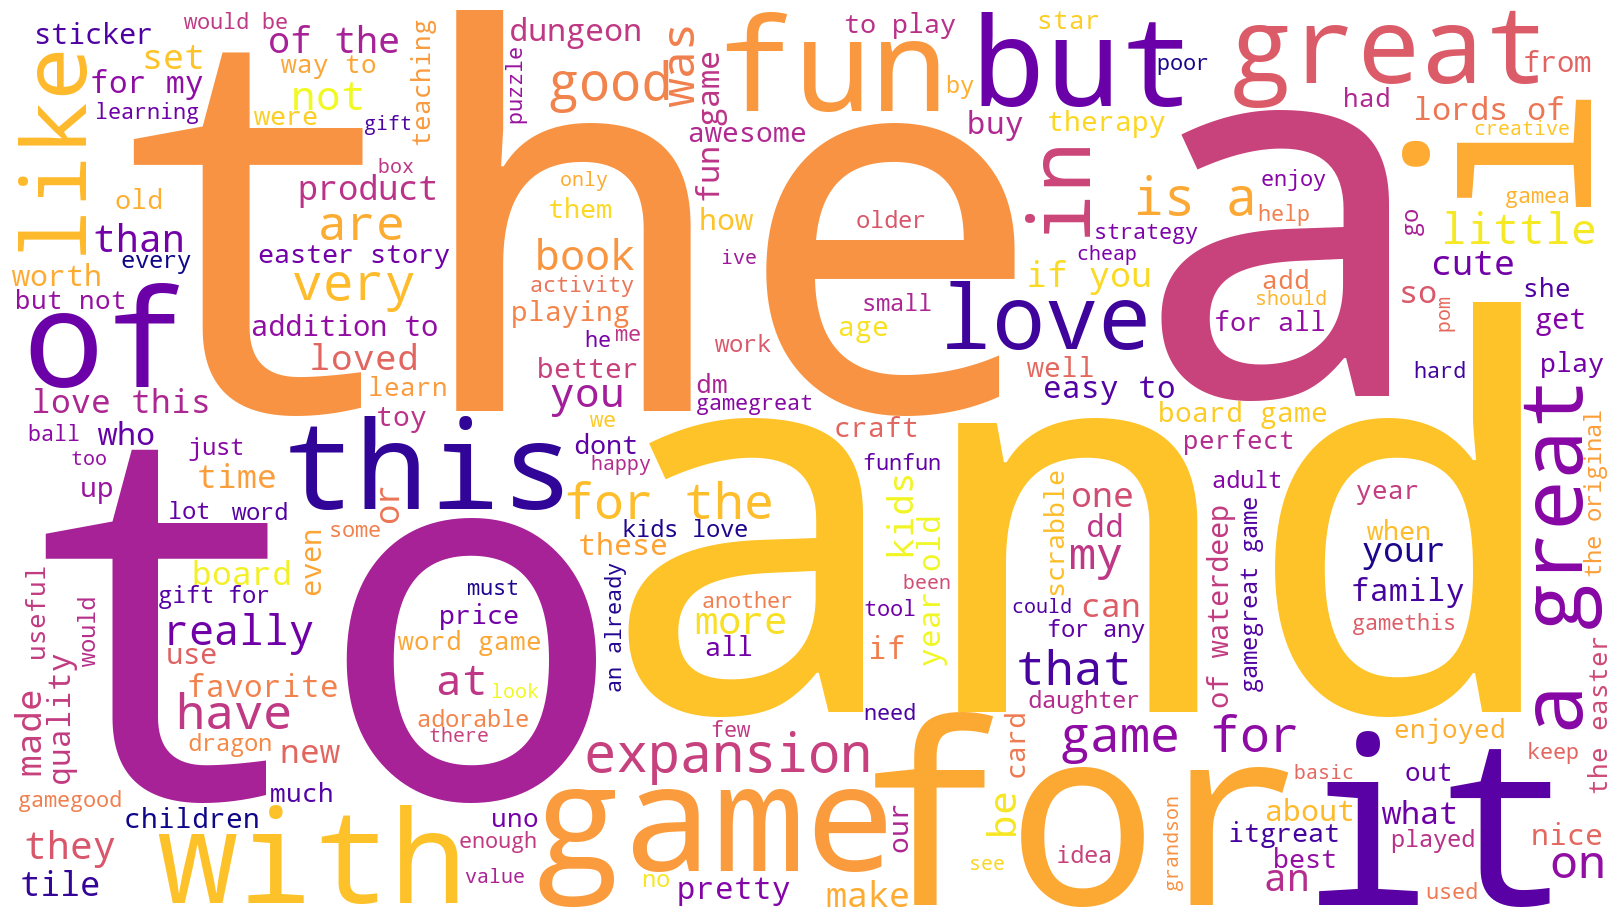

In [477]:
# Summary: Plot the WordCloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [478]:
# Define an empty list of tokens for the review column.
all_tokens_review = []

for i in range(df4_copy.shape[0]):
    # Add each token to the list.
    all_tokens_review = all_tokens_review + df4_copy['tokens'][i]

In [479]:
# Determine the frequency distribution for the review column.
fdist = FreqDist(all_tokens_review)

# Preview data.
fdist

FreqDist({'the': 5019, 'and': 2934, 'to': 2843, 'a': 2829, 'of': 2261, 'i': 1887, 'it': 1830, 'is': 1593, 'this': 1549, 'for': 1360, ...})

In [480]:
# Define an empty list of tokens for the summary column.
all_tokens_summary = []

for i in range(df4_copy.shape[0]):
    # Add each token to the list.
    all_tokens_summary = all_tokens_summary + df4_copy['tokens_2'][i]

In [481]:
# Determine the frequency distribution for the summary column.
fdist2 = FreqDist(all_tokens_summary)

# Preview data.
fdist2

FreqDist({'game': 268, 'the': 257, 'a': 238, 'great': 236, 'for': 229, 'to': 192, 'fun': 175, 'and': 168, 'it': 139, 'of': 131, ...})

### 4b) Remove alphanumeric characters and stopwords

In [482]:
# Delete all the alpanum.
# This is for the review column.
tokens = [word for word in all_tokens_review if word.isalnum()]

In [483]:
# Delete all the alpanum.
# This is for the summary column.
tokens2 = [word for word in all_tokens_summary if word.isalnum()]

In [484]:
# Remove all the stopwords from review column.
# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
tokens_filtered = [x for x in tokens if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens_string = ''

for value in tokens:
    # Add each filtered token word to the string.
    tokens_string = tokens_string + value + ' '

In [485]:
# Remove all the stopwords from summary column.
# Create a filtered list of tokens without stopwords.
tokens2_filtered = [x for x in tokens2 if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens2_string = ''

for value in tokens2:
    # Add each filtered token word to the string.
    tokens2_string = tokens2_string + value + ' '

### 4c) Create wordcloud without stopwords

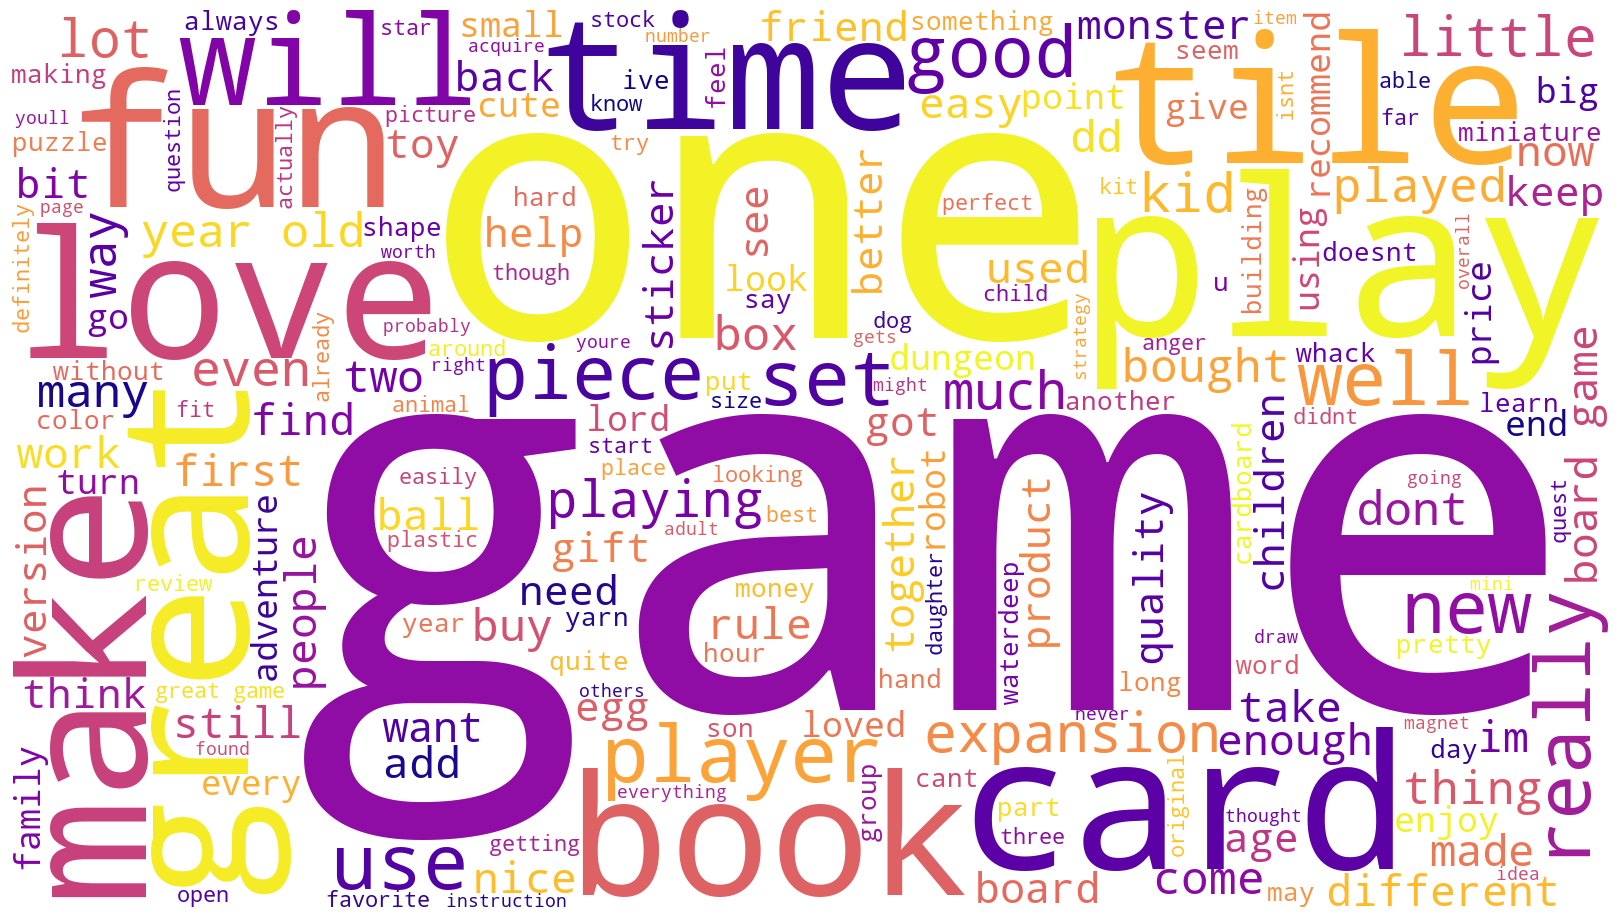

In [486]:
# Create a WordCloud for review column.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [487]:
# Create a WordCloud for summary column.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(tokens2_string) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

### 4d) Identify 15 most common words and polarity

In [488]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [489]:
# Determine the 15 most common words.
# This is for the review column.
fdist3 = FreqDist(tokens_filtered)

# Preview data.
fdist3

FreqDist({'game': 1359, 'one': 475, 'play': 442, 'fun': 407, 'great': 391, 'like': 373, 'get': 293, 'cards': 281, 'tiles': 280, 'really': 278, ...})

In [490]:
# Generate a DataFrame from Counter.
# This is for the review column.
counts = pd.DataFrame(Counter(tokens_filtered).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts

Frequency
Word             
game         1359
one           475
play          442
fun           407
great         391
like          373
get           293
cards         281
tiles         280
really        278
book          259
would         252
well          246
time          244
new           237

In [491]:
# Set the plot type.
ax = counts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("review column: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

In [492]:
# Calculate sentiment polarity for 15 most common words - for review column.
counts.reset_index(inplace=True)
counts['polarity'] = counts['Word'].apply(generate_polarity)

# View the output.
counts

Word  Frequency  polarity
0     game       1359 -0.400000
1      one        475  0.000000
2     play        442  0.000000
3      fun        407  0.300000
4    great        391  0.800000
5     like        373  0.000000
6      get        293  0.000000
7    cards        281  0.000000
8    tiles        280  0.000000
9   really        278  0.200000
10    book        259  0.000000
11   would        252  0.000000
12    well        246  0.000000
13    time        244  0.000000
14     new        237  0.136364

In [493]:
# Determine the 15 most common words.
# This is for the summary column.
fdist4 = FreqDist(tokens2_filtered)

# Preview data.
fdist4

FreqDist({'game': 268, 'great': 236, 'fun': 175, 'good': 84, 'love': 70, 'like': 54, 'kids': 48, 'book': 42, 'expansion': 42, 'cute': 40, ...})

In [494]:
# Generate a DataFrame from Counter.
# This is for the summary column.
counts2 = pd.DataFrame(Counter(tokens2_filtered).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts2

Frequency
Word                
game             268
great            236
fun              175
good              84
love              70
like              54
kids              48
book              42
expansion         42
cute              40
old               34
really            30
set               29
nice              28
one               28

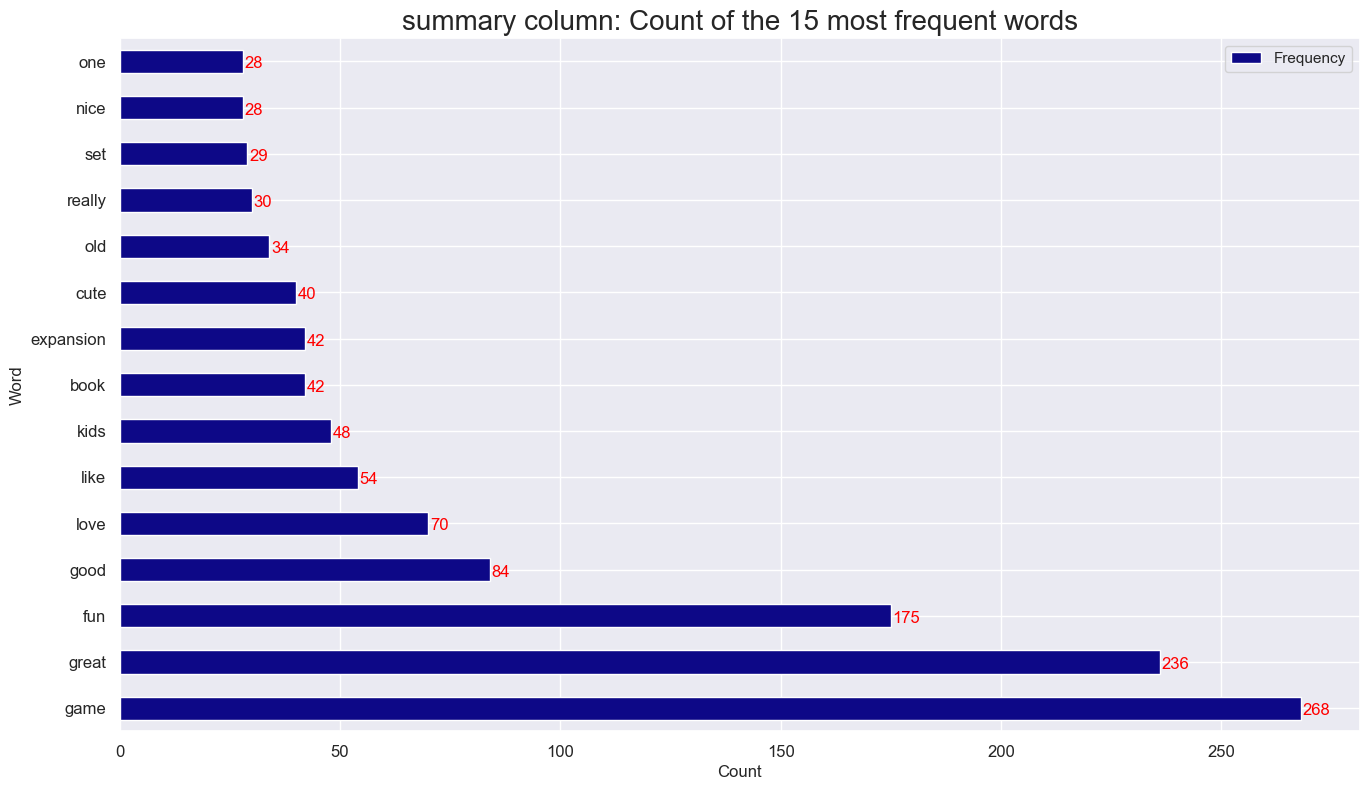

In [495]:
# Set the plot type.
ax = counts2.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='plasma')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("summary column: Count of the 15 most frequent words",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')

In [496]:
# Calculate sentiment polarity for 15 most common words - for summary column.
counts2.reset_index(inplace=True)
counts2['polarity'] = counts['Word'].apply(generate_polarity)

# View the output.
counts2

Word  Frequency  polarity
0        game        268 -0.400000
1       great        236  0.000000
2         fun        175  0.000000
3        good         84  0.300000
4        love         70  0.800000
5        like         54  0.000000
6        kids         48  0.000000
7        book         42  0.000000
8   expansion         42  0.000000
9        cute         40  0.200000
10        old         34  0.000000
11     really         30  0.000000
12        set         29  0.000000
13       nice         28  0.000000
14        one         28  0.136364

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [497]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [498]:
# Determine polarity of both columns. 
df4_copy['Polarity_review'] = df4_copy['review'].apply(generate_polarity)
df4_copy['Polarity_summary'] = df4_copy['summary'].apply(generate_polarity)

# View output for review column.
df4_copy['Polarity_review'].head()

0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: Polarity_review, dtype: float64

In [499]:
# View output for summary column.
df4_copy['Polarity_summary'].head()

0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: Polarity_summary, dtype: float64

In [500]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
# Histogram of sentiment score
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df4_copy['Polarity_review'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity for the review column', fontsize=20)
plt.show()

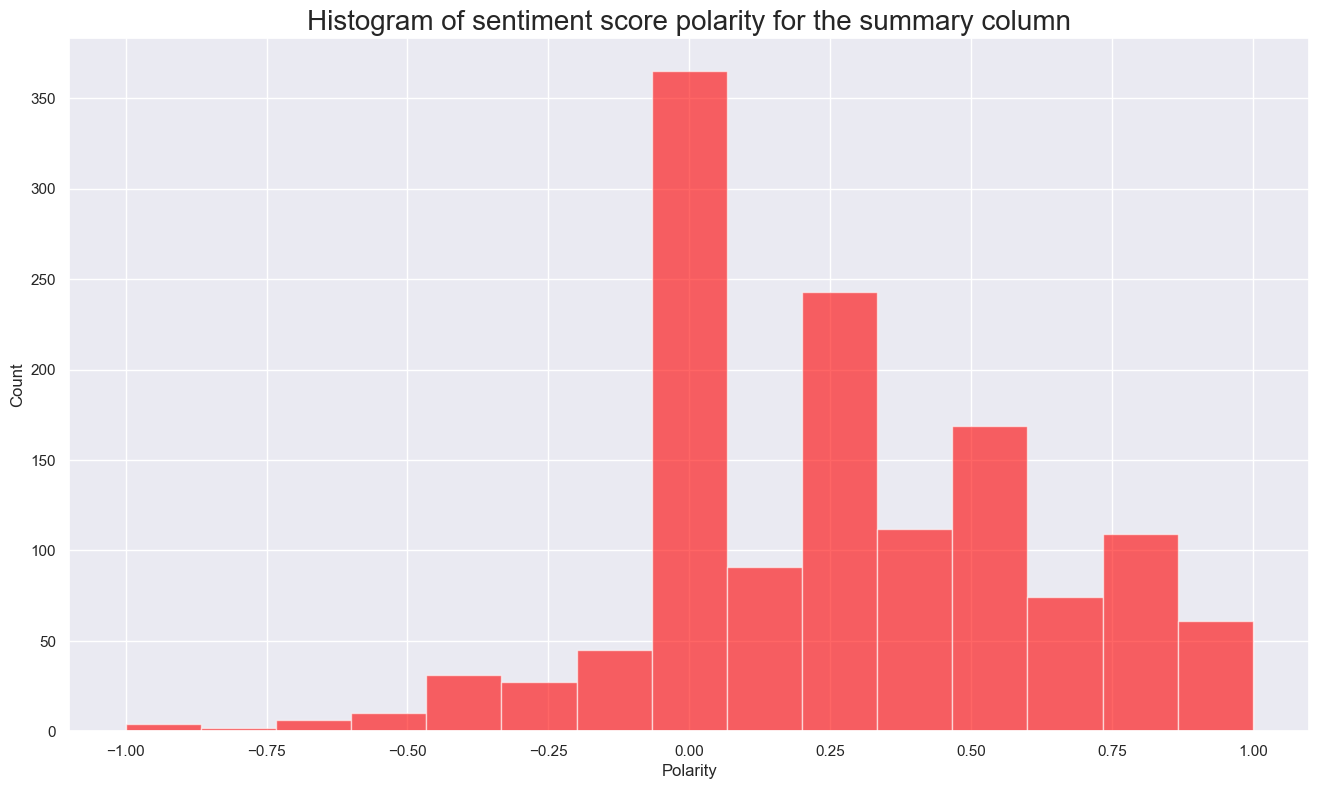

In [501]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity
# Histogram of sentiment score
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df4_copy['Polarity_summary'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity for the summary column', fontsize=20)
plt.show()

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [502]:
# Top 20 negative reviews.
negative_sentiment_review = df4_copy.nsmallest(20, 'Polarity_review')

# Eliminate unnecessary columns.
negative_sentiment_review = negative_sentiment_review[['review', 'Polarity_review']]

# View output.
negative_sentiment_review.style.set_properties(subset=['review'], **{'width': '1200px'})

In [503]:
# Top 20 negative summaries.
negative_sentiment_summary = df4_copy.nsmallest(20, 'Polarity_summary')

# Eliminate unnecessary columns.
negative_sentiment_summary = negative_sentiment_summary[['summary', 'Polarity_summary']]

# View output.
negative_sentiment_summary.style.set_properties(subset=['summary'], **{'width': '1200px'})

In [504]:
# Top 20 positive reviews.
positive_sentiment_review = df4_copy.nlargest(20, 'Polarity_review')

# Eliminate unnecessary columns.
positive_sentiment_review = positive_sentiment_review[['review', 'Polarity_review']]

# View output.
positive_sentiment_review.style.set_properties(subset=['review'], **{'width': '1200px'})

In [505]:
# Top 20 positive summaries.
positive_sentiment_summary = df4_copy.nlargest(20, 'Polarity_summary')

# Eliminate unnecessary columns.
positive_sentiment_summary = positive_sentiment_summary[['summary', 'Polarity_summary']]

# View output.
positive_sentiment_summary.style.set_properties(subset=['summary'], **{'width': '1200px'})

## 7. Discuss: Insights and observations

***Your observations here...***

The histograms for sentiment analysis on the review and summary columns are showing a positive sentiment overall with little frequency/count for negative sentiments.

The 15 most common words identified in the review column include positive sentiments with words such as fun, great and like. It also contains reference to items that are sold by Turtle games such as game, cards and books.

The 15 most common words identified in the summary column include postive sentiments with words like great, fun, good, love, like and nice. Products are identified such as books and games as well as a target audience:kids.

The machine learning algorithm used for sentiment analysis identified the most common word, game, as a negative sentiment which isn't the case in the context of this scenario - a company that sells games. It should be positive or neutral at the very least. 